In [3]:
%load_ext autoreload
%autoreload 2

import os
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('agg')
% matplotlib inline
import sys
sys.path.append('models/cifar')
import copy

import torch
from torch.optim import SGD
# from torchvision import models
import numpy as np 
from torch.autograd import Variable
import torchvision.transforms as transforms
import torch.utils.data as data
import torch.nn as nn
import torchvision.datasets as datasets

sys.path.append('models/cifar/scatwave')
from scattering import Scattering

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# make scat

In [23]:
scat = Scattering(M=32, N=32, J=1).cuda()

# run scat

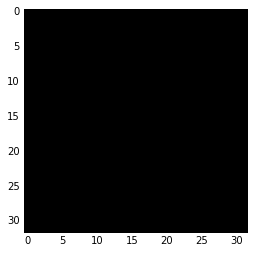

torch.Size([1, 3, 9, 16, 16])


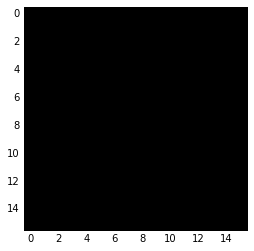

(9, 16, 16, 3)

In [29]:
x = torch.zeros(1, 3, 32, 32).cuda()
plt.imshow(x.cpu().numpy()[0].transpose())
plt.show()


y = scat(x)
print(y.shape)
y_np = y.cpu().numpy()[0].transpose(1, 2, 3, 0)
plt.imshow(y_np[3])
plt.show()
y_np.shape

# try to maximally activate

In [14]:
torch_image = make_image()
print(torch_image.shape)
#     print(torch_image.shape)
# im_as_var = Variable(torch_image.cuda(), requires_grad=True)
im_as_var = torch_image
optimizer = SGD([im_as_var], lr=12,  weight_decay=1e-4)
for i in range(1, 10):
    optimizer.zero_grad()
    y = scat(im_as_var)
    loss = -1 * y[0, f_num, 4, 4]
    loss.backward()
    optimizer.step()

torch.Size([1, 3, 32, 32])


TypeError: optimizer can only optimize Variables, but one of the params is torch.FloatTensor

In [ ]:
torch_image = make_image()
#     print(torch_image.shape)
im_as_var = Variable(torch_image.cuda(), requires_grad=True)